## SIR model using Octave and LSODE

Octave requires a function that returns the gradient of the system, given the current state of the system, `x` and the time, `t`.

In [1]:
function xdot = sir_eqn(x,t)
    % Parameter values
    beta=0.1;
    mu=0.05;

    % Define variables
    s = x(1);
    y = x(2);
    r = x(3);

    % Define ODEs
    ds=-beta*s*y;
    dy=beta*s*y-mu*y;
    dr=mu*y;

    % Return gradients
    xdot = [ds,dy,dr];
endfunction

We then set up the time axis over which to integrate and the initial conditions.

In [2]:
t = linspace(0, 200, 2001)+.1;
x0=[0.99,0.01,0];

The function lsode can be used to solve ODEs of this form using Hindmarsh’s ODE solver [LSODE](https://computation.llnl.gov/casc/nsde/pubs/u113855.pdf).

In [3]:
x = lsode("sir_eqn",x0, t);

The following saves the times and the states.

In [25]:
out=[transpose(t),x];
save -ascii sir_octave.out out;

In [23]:
!head sir_octave.out

 1.00000000e-01 9.90000000e-01 1.00000000e-02 0.00000000e+00
 2.00000000e-01 9.89900759e-01 1.00491165e-02 5.01241223e-05
 3.00000000e-01 9.89801042e-01 1.00984640e-02 1.00494189e-04
 4.00000000e-01 9.89700844e-01 1.01480441e-02 1.51112049e-04
 5.00000000e-01 9.89600163e-01 1.01978578e-02 2.01979039e-04
 6.00000000e-01 9.89499005e-01 1.02479029e-02 2.53092305e-04
 7.00000000e-01 9.89397349e-01 1.02981882e-02 3.04462323e-04
 8.00000000e-01 9.89295211e-01 1.03487075e-02 3.56081707e-04
 9.00000000e-01 9.89192584e-01 1.03994631e-02 4.07953352e-04
 1.00000000e+00 9.89089464e-01 1.04504565e-02 4.60079036e-04


### Visualisation

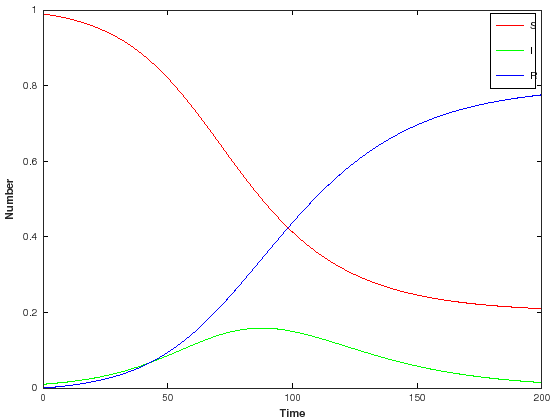

In [21]:
plot(t,x(:,1),"-r",t,x(:,2),"-g",t,x(:,3),"-b")
xlim([0 200])
xlabel("Time","fontweight","bold")
ylabel("Number","fontweight","bold")
h = legend("S","I","R");
legend(h,"show")